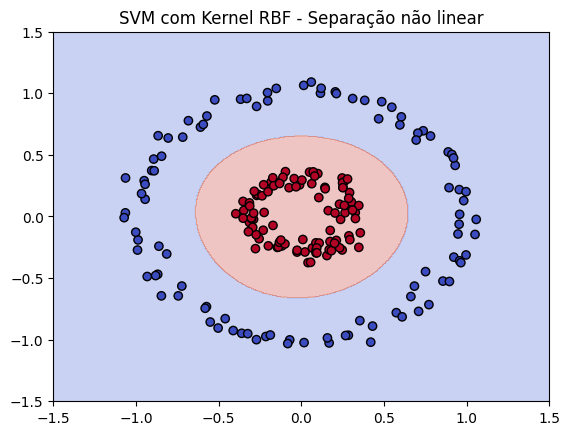

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles

# 1️⃣ GERAR DADOS NÃO LINEARMENTE SEPARÁVEIS
# make_circles cria dois conjuntos de pontos em forma de círculo:
# - Classe 0: anel exterior
# - Classe 1: círculo interior
# "factor" controla a distância entre os círculos
# "noise" adiciona algum ruído para os dados não ficarem perfeitos
X, y = make_circles(n_samples=200, factor=0.3, noise=0.05, random_state=42)

# 2️⃣ CRIAR E TREINAR UMA SVM COM KERNEL RBF
# kernel='rbf' diz ao modelo para usar Radial Basis Function
# C controla o quanto penalizamos erros no treino (maior C = fronteira mais justa aos dados)
# gamma controla o alcance da influência de cada ponto (maior gamma = fronteira mais recortada)
modelo = svm.SVC(kernel='rbf', C=1, gamma=1)
modelo.fit(X, y)  # Aqui a SVM aprende a fronteira de decisão

# 3️⃣ CRIAR UMA GRELLHA DE PONTOS PARA DESENHAR A FRONTEIRA
# np.meshgrid cria uma grelha bidimensional de pontos no espaço dos dados
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500),
                     np.linspace(-1.5, 1.5, 500))

# 4️⃣ USAR O MODELO PARA PREVER A CLASSE DE CADA PONTO DA GRELLHA
# np.c_ junta as coordenadas xx e yy num array de pontos 2D
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

# 5️⃣ REORGANIZAR AS PREVISÕES PARA O FORMATO DA GRELLHA
# .reshape devolve Z ao formato original (mesmas dimensões de xx e yy)
Z = Z.reshape(xx.shape)

# 6️⃣ DESENHAR A FRONTEIRA E OS DADOS
# contourf desenha regiões coloridas para cada classe prevista pela SVM
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# scatter desenha os pontos reais, coloridos pela classe (y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

plt.title("SVM com Kernel RBF - Separação não linear")
plt.show()
